# 讀取訓練數據

In [45]:
import pandas as pd
from tqdm import tqdm

# 假設資料檔案為 'large_data.csv'
file_path = '38_Training_Data_Set_V2/training.csv'

# 定義分塊大小
chunk_size = 1000 # 每次讀取 10000 條數據
chunks = pd.read_csv(file_path, chunksize=chunk_size)

# 初始化變數來儲存平衡後的數據
balanced_data = []

# 讀取數量
v = 0

for chunk in tqdm(chunks):
    # 計算每個類別的樣本數量
    min_count = chunk['飆股'].value_counts().min()
    
    # 進行平衡：ing
    chunk_balanced = chunk.groupby('飆股').apply(lambda x: x.sample(min_count)).reset_index(drop=True)
    
    # 將平衡後的數據加入列表
    balanced_data.append(chunk_balanced)

    # 若達到限制讀取數量則跳脫
    v += 1
    if v >= 1000:
        break

# 將所有平衡後的數據合併為一個 DataFrame
balanced_data = pd.concat(balanced_data, ignore_index=True)

balanced_data


0it [00:00, ?it/s]

C:\Users\TMP-214\AppData\Local\Temp\ipykernel_26304\372332661.py:22: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  chunk_balanced = chunk.groupby('飆股').apply(lambda x: x.sample(min_count)).reset_index(drop=True)
1it [00:03,  3.80s/it]C:\Users\TMP-214\AppData\Local\Temp\ipykernel_26304\372332661.py:22: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  chunk_balanced = chunk.groupby('飆股').apply(lambda x: x.sample

,ID,外資券商_分點進出,外資券商_分點買賣力,外資券商_分點成交力(%),外資券商_分點吃貨比(%),外資券商_分點出貨比(%),外資券商_前1天分點進出,外資券商_前1天分點買賣力,外資券商_前1天分點成交力(%),外資券商_前1天分點吃貨比(%),...,上市加權指數前15天成交量,上市加權指數前16天成交量,上市加權指數前17天成交量,上市加權指數前18天成交量,上市加權指數前19天成交量,上市加權指數前20天成交量,上市加權指數5天成交量波動度,上市加權指數10天成交量波動度,上市加權指數20天成交量波動度,飆股
0,TR-531,0.5962,0.6311,0.4084,1.2178,2.0444,1.8005,1.1416,1.1756,2.2634,...,1.3610,1.1651,1.6991,1.9468,1.3012,1.1072,1.6805,1.0586,0.8108,0
1,TR-377,1.2219,NaN,1.2413,0.5313,0.5329,1.2258,NaN,1.2238,0.5228,...,0.1129,0.2972,0.2188,-0.1195,0.0911,0.1403,0.4605,0.8644,0.7171,0
2,TR-786,1.2219,NaN,NaN,NaN,NaN,1.2258,NaN,1.2238,0.5228,...,1.7787,1.4512,1.5862,1.6179,1.8625,1.2076,1.0365,0.8057,1.2967,0
3,TR-251,0.9324,0.8956,0.2433,2.3677,3.3260,0.9495,0.9362,1.1169,0.6527,...,0.2001,0.3719,0.5857,0.3949,0.3976,0.7972,1.3019,0.5210,0.5289,0
4,TR-775,1.2219,NaN,1.2413,0.5313,0.5329,1.2258,NaN,1.2238,0.5228,...,2.0852,2.7335,2.3195,2.4821,2.6507,2.0653,2.1061,1.3552,1.6126,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935,TR-200736,1.1885,0.7774,-0.1941,2.3180,3.7225,1.1787,1.0851,1.0731,1.6119,...,1.3660,1.2182,1.3742,1.0321,1.3339,1.9647,0.8373,0.9554,0.7367,0
2936,TR-200140,1.2219,NaN,1.2413,0.5313,0.5329,1.2258,NaN,1.2238,0.5228,...,0.4108,0.4678,0.5589,1.0939,0.3057,0.1850,0.1115,-0.0830,0.3254,0
2937,TR-200454,1.2219,NaN,1.2413,0.5313,0.5329,1.2258,NaN,1.2238,0.5228,...,0.3620,0.6632,0.4884,0.6772,0.7969,0.2100,1.0803,0.3058,0.6216,1
2938,TR-200236,-3.5257,1.0531,0.8662,1.9425,2.2811,0.1487,1.1847,1.2070,1.9726,...,0.9961,0.7341,0.8239,0.6790,0.9518,0.6522,0.9758,0.5494,0.9511,1


In [60]:
balanced_data['飆股'].value_counts()

飆股
0    1470
1    1470
Name: count, dtype: int64

In [61]:
x_col = balanced_data.drop(['ID','飆股'],axis=1).columns.tolist()
y_col = '飆股'

# 轉換成catboost可接受格式

In [62]:
import catboost
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split

In [63]:
X_train, X_test, y_train, y_test = train_test_split(
    balanced_data[x_col], balanced_data[y_col], 
    test_size=0.2, random_state=42
)

X_test,X_test_final,y_test,y_test_final = train_test_split(
    X_test, y_test, 
    test_size=0.5, random_state=42
)

In [64]:
# 3. 建立 Pool（可選）
train_pool = Pool(data=X_train, label=y_train)
test_pool = Pool(data=X_test, label=y_test)

In [65]:
# 4. 設定模型參數
model = CatBoostClassifier(
    iterations=100,
    learning_rate=0.1,
    depth=6,
    loss_function='Logloss',
    eval_metric='F1',
    task_type='GPU',        # ✅ 使用 GPU
    devices='0',            # 使用第0張GPU
    verbose=1
)

In [66]:
# 5. 訓練模型
model.fit(train_pool, eval_set=test_pool)

0:	learn: 0.9211760	test: 0.9085174	best: 0.9085174 (0)	total: 321ms	remaining: 31.8s
1:	learn: 0.9269117	test: 0.9142857	best: 0.9142857 (1)	total: 480ms	remaining: 23.5s
2:	learn: 0.9281814	test: 0.9240506	best: 0.9240506 (2)	total: 632ms	remaining: 20.4s
3:	learn: 0.9326078	test: 0.9245283	best: 0.9245283 (3)	total: 776ms	remaining: 18.6s
4:	learn: 0.9367407	test: 0.9177215	best: 0.9245283 (3)	total: 927ms	remaining: 17.6s
5:	learn: 0.9416702	test: 0.9269841	best: 0.9269841 (5)	total: 1.08s	remaining: 16.9s
6:	learn: 0.9407812	test: 0.9235669	best: 0.9269841 (5)	total: 1.22s	remaining: 16.3s
7:	learn: 0.9425094	test: 0.9235669	best: 0.9269841 (5)	total: 1.37s	remaining: 15.7s
8:	learn: 0.9433962	test: 0.9269841	best: 0.9269841 (5)	total: 1.52s	remaining: 15.3s
9:	learn: 0.9433011	test: 0.9269841	best: 0.9269841 (5)	total: 1.66s	remaining: 15s
10:	learn: 0.9480302	test: 0.9269841	best: 0.9269841 (5)	total: 1.81s	remaining: 14.6s
11:	learn: 0.9480737	test: 0.9269841	best: 0.9269841 (5

In [67]:
# 6. 預測與評估
from sklearn.metrics import f1_score
y_pred = model.predict(X_test_final)
f1 = f1_score(y_test_final, y_pred)
print(f"F1 Score: {f1:.4f}")

F1 Score: 0.9362


# 預測公開測試集

In [68]:
pub_x = pd.read_csv('38_Public_Test_Set_and_Submmision_Template_V2/38_Public_Test_Set_and_Submmision_Template_V2/public_x.csv')
pub_x

,ID,外資券商_分點進出,外資券商_分點買賣力,外資券商_分點成交力(%),外資券商_分點吃貨比(%),外資券商_分點出貨比(%),外資券商_前1天分點進出,外資券商_前1天分點買賣力,外資券商_前1天分點成交力(%),外資券商_前1天分點吃貨比(%),...,上市加權指數前14天成交量,上市加權指數前15天成交量,上市加權指數前16天成交量,上市加權指數前17天成交量,上市加權指數前18天成交量,上市加權指數前19天成交量,上市加權指數前20天成交量,上市加權指數5天成交量波動度,上市加權指數10天成交量波動度,上市加權指數20天成交量波動度
0,PU-1,1.2219,NaN,1.2413,0.5313,0.5329,1.2258,NaN,1.2238,0.5228,...,0.3492,0.1014,0.4583,0.2233,0.5630,0.2876,0.2664,0.8630,0.4614,0.3086
1,PU-2,1.2219,NaN,1.2413,0.5313,0.5329,1.2243,1.2072,1.2238,0.5228,...,1.8991,2.3784,1.9220,2.3146,3.4425,2.8982,2.8924,1.6241,2.2758,1.8835
2,PU-3,3.2984,1.4356,1.8457,3.5096,2.8033,-2.3714,1.2767,1.3264,2.3178,...,0.6375,0.4582,0.8285,0.7927,1.4526,1.2864,1.1145,0.5992,2.3232,2.0103
3,PU-4,1.2211,-0.3363,0.7311,0.5313,1.0516,1.2258,NaN,1.2104,0.5228,...,0.5781,0.9577,0.6808,0.5511,0.1747,0.0290,0.1628,0.8125,0.7227,0.5577
4,PU-5,1.5689,1.5861,1.8969,2.4814,1.7553,1.0782,1.3010,1.2881,1.7097,...,1.0682,1.0271,0.9876,1.7390,1.3109,1.6806,1.3216,4.1865,2.7835,1.7238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25103,PU-25104,1.2219,NaN,1.2413,0.5313,0.5329,1.2250,1.2072,1.2238,0.5228,...,3.0928,2.4741,2.2177,2.4033,2.0818,2.5835,2.3398,1.3057,0.8594,1.4832
25104,PU-25105,1.3073,1.2751,1.3396,3.4861,3.2950,-0.0939,1.2131,1.2345,3.0997,...,3.3519,2.5249,2.8949,2.3010,2.3636,2.7702,2.3189,2.0434,1.9664,1.8610
25105,PU-25106,1.2041,-0.3363,0.3484,0.5313,1.4406,1.1811,1.0835,1.1827,0.5228,...,0.6593,0.9105,0.7159,0.6506,0.8340,1.0138,1.2428,0.3604,-0.2059,0.2469
25106,PU-25107,1.0892,0.6864,0.8777,0.8795,1.2398,1.4488,1.1700,1.2118,1.2927,...,1.0392,1.3660,1.2182,1.3742,1.0321,1.3339,1.9647,0.8373,0.9554,0.7367


In [69]:
y_pred = model.predict(pub_x[x_col])
y_pred

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [70]:
pd.Series(y_pred).value_counts()

0    22568
1     2540
Name: count, dtype: int64

In [71]:
submit = pd.read_csv('38_Public_Test_Set_and_Submmision_Template_V2/38_Public_Test_Set_and_Submmision_Template_V2/submission_template_public.csv')
submit['飆股'] = y_pred
submit.to_csv('submit.csv',index=False)

# 特徵重要度

1. 技術指標_月RSI(10): 22.3909
2. 個股19天乖離率: 6.4692
3. 技術指標_季D(9): 5.0722
4. 技術指標_週RSI(5): 3.5948
5. 技術指標_週RSI(10): 3.5920
6. 技術指標_月ADX(14): 3.2668
7. 技術指標_季K(9): 2.9833
8. 技術指標_乖離率(250日): 2.4852
9. 技術指標_Alpha(250D): 2.0926
10. 技術指標_RSI(10): 1.7805


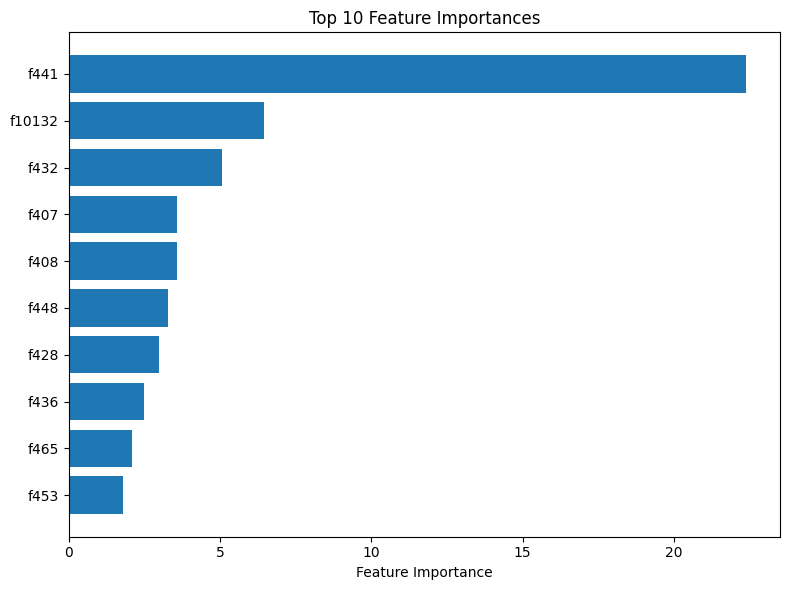

In [72]:
import matplotlib.pyplot as plt
import numpy as np

# 取得特徵重要度
importances = model.get_feature_importance()

# 假設你沒有 feature names，就用預設 f0, f1, f2...
feature_names = [f"f{i}" for i in range(len(importances))]

# 取得前10名的重要度與名稱
top_n = 10
indices = np.argsort(importances)[::-1][:top_n]  # 由大到小排序
top_features = [feature_names[i] for i in indices]
top_importances = importances[indices]

# 顯示數值
for i, (name, score) in enumerate(zip(top_features, top_importances)):
    print(f"{i+1}. {x_col[int(name[1:])]}: {score:.4f}")

# 繪圖
plt.figure(figsize=(8, 6))
plt.barh(range(top_n), top_importances[::-1], align='center')
plt.yticks(range(top_n), top_features[::-1])
plt.xlabel("Feature Importance")
plt.title("Top 10 Feature Importances")
plt.tight_layout()
plt.show()


In [74]:
new_x_col = []
for i, (name, score) in enumerate(zip(top_features, top_importances)):
    new_x_col.append(x_col[int(name[1:])])
new_x_col

['技術指標_月RSI(10)',
 '個股19天乖離率',
 '技術指標_季D(9)',
 '技術指標_週RSI(5)',
 '技術指標_週RSI(10)',
 '技術指標_月ADX(14)',
 '技術指標_季K(9)',
 '技術指標_乖離率(250日)',
 '技術指標_Alpha(250D)',
 '技術指標_RSI(10)']

In [76]:
balanced_data[new_x_col].to_csv('balanced_data_with_top10_features.csv')